In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data1=pd.read_csv(r"C:\Users\AISHWARYA\Downloads\Jan2022.csv", encoding='latin-1')
data1.T.head()

,0,1,2,3,4,5,6,7,8,9,...,59,60,61,62,63,64,65,66,67,68
KARNATAKA STATE ROAD TRANSPORT CORPORATION,DIVISIONWISE OPERATIONAL RESULTS FOR THE MONTH...,NaN,NaN,Sl.No.,NaN,1,NaN,2,NaN,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 1,NaN,NaN,NaN,Factor,Physical performance,Schedules,(As on last day),Fleet Held,(As on last day),Fleet Utilisation (%),...,MDY,CJR,HSN,CKM,MNG,PTR,DVG,SMG,CDG,KBS
Unnamed: 2,NaN,NaN,NaN,BNG©,NaN,592,NaN,741,NaN,58.7,...,Mandya,Chamarajanagar,Hassan,Chikkamagaluru,Mangaluru,Puttur,Davanagere,Shivamoga,Chitradurga,Kempegowda Bus Station is a Division with just...
Unnamed: 3,NaN,NaN,NaN,RMN,NaN,473,NaN,496,NaN,81.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 4,NaN,NaN,NaN,TMK,NaN,575,NaN,615,NaN,80.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
D1=data1.T
D1.columns=D1.iloc[1]
D1=D1[2:]
D1
col_to_keep=['Schedules','Fleet Held (As on last day)','Fleet Utilisation (%)','% off road  vehicles','Schedule kms (in lakh)', 'Effective Kilometers (in lakh)']
D1.drop(columns=[col for col in D1.columns if col not in col_to_keep],inplace=True)
#remove empty rows
D1.dropna(inplace=True)
D1
#adding a new column as city id
D1['City_Id'] = range(1, len(D1) + 1)
D1.columns

Index(['Schedules', 'Fleet Utilisation (%)', '% off road  vehicles',
       'Schedule kms (in lakh)', 'Effective Kilometers (in lakh)', 'City_Id'],
      dtype='object', name='Unnamed: 1')

In [4]:
print(D1.columns)

Index(['Schedules', 'Fleet Utilisation (%)', '% off road  vehicles',
       'Schedule kms (in lakh)', 'Effective Kilometers (in lakh)', 'City_Id'],
      dtype='object', name='Unnamed: 1')


In [6]:
#Effective passenger density
#effPassDensity=(('Fleet Utilisation(%)')*0.01)*('Fleet Held')
D1['Fleet Utilisation (%)'] = pd.to_numeric(D1['Fleet Utilisation (%)'], errors='coerce')
D1['Schedules'] = pd.to_numeric(D1['Schedules'], errors='coerce')


FleetUtilisation=D1['Fleet Utilisation (%)']*0.01
FleetHeldArray=D1['Schedules']
EffPassDensity=np.multiply(FleetUtilisation, FleetHeldArray)
D1['EffPassDensity']=EffPassDensity

In [7]:
D1.info


<bound method DataFrame.info of Unnamed: 1   Schedules  Fleet Utilisation (%) % off road  vehicles  \
Unnamed: 2         592                   58.7                  5.4   
Unnamed: 3         473                   81.7                  3.3   
Unnamed: 4         575                   80.3                  4.6   
Unnamed: 5         512                   83.2                  3.4   
Unnamed: 6         528                   87.0                  3.6   
Unnamed: 7         368                   71.5                  3.9   
Unnamed: 8         620                   74.9                  6.4   
Unnamed: 9         416                   77.4                  4.7   
Unnamed: 10        463                   82.9                  5.9   
Unnamed: 11        522                   85.5                  7.5   
Unnamed: 12        499                   87.3                  3.5   
Unnamed: 13        481                   77.0                  7.4   
Unnamed: 14        488                   79.3             

In [8]:
D1.head()

Unnamed: 1,Schedules,Fleet Utilisation (%),% off road vehicles,Schedule kms (in lakh),Effective Kilometers (in lakh),City_Id,EffPassDensity
Unnamed: 2,592,58.7,5.4,55.55,58.91,1,347.504
Unnamed: 3,473,81.7,3.3,36.71,37.72,2,386.441
Unnamed: 4,575,80.3,4.6,52.81,52.47,3,461.725
Unnamed: 5,512,83.2,3.4,43.49,47.18,4,425.984
Unnamed: 6,528,87.0,3.6,51.17,54.04,5,459.360


In [9]:
D1.tail()

Unnamed: 1,Schedules,Fleet Utilisation (%),% off road vehicles,Schedule kms (in lakh),Effective Kilometers (in lakh),City_Id,EffPassDensity
Unnamed: 14,488,79.3,5.2,42.51,41.84,13,386.984
Unnamed: 15,338,90.5,4.6,33.00,33.58,14,305.890
Unnamed: 16,323,82.2,4.3,30.24,32.42,15,265.506
Unnamed: 17,277,81.9,6.9,27.94,26.93,16,226.863
Unnamed: 19,7475,79.3,5.1,684.61,695.06,17,5927.675


In [10]:
D1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, Unnamed: 2 to Unnamed: 19
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Schedules                       17 non-null     int64  
 1   Fleet Utilisation (%)           17 non-null     float64
 2   % off road  vehicles            17 non-null     object 
 3   Schedule kms (in lakh)          17 non-null     object 
 4   Effective Kilometers (in lakh)  17 non-null     object 
 5   City_Id                         17 non-null     int64  
 6   EffPassDensity                  17 non-null     float64
dtypes: float64(2), int64(2), object(3)
memory usage: 1.1+ KB


In [11]:
D1

Unnamed: 1,Schedules,Fleet Utilisation (%),% off road vehicles,Schedule kms (in lakh),Effective Kilometers (in lakh),City_Id,EffPassDensity
Unnamed: 2,592,58.7,5.4,55.55,58.91,1,347.504
Unnamed: 3,473,81.7,3.3,36.71,37.72,2,386.441
Unnamed: 4,575,80.3,4.6,52.81,52.47,3,461.725
Unnamed: 5,512,83.2,3.4,43.49,47.18,4,425.984
Unnamed: 6,528,87.0,3.6,51.17,54.04,5,459.360
Unnamed: 7,368,71.5,3.9,19.66,19.88,6,263.120
Unnamed: 8,620,74.9,6.4,58.32,58.52,7,464.380
Unnamed: 9,416,77.4,4.7,39.44,37.84,8,321.984
Unnamed: 10,463,82.9,5.9,43.48,43.88,9,383.827
Unnamed: 11,522,85.5,7.5,50.62,49.56,10,446.310


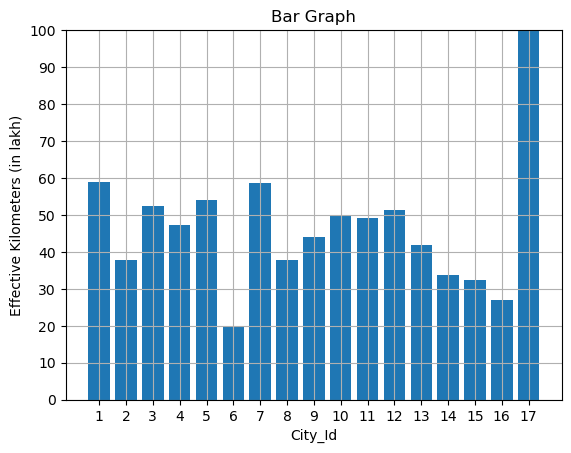

In [37]:
X=D1['City_Id']
Y=D1['Effective Kilometers (in lakh)']
plt.bar(X,Y)
plt.title("Bar Graph")
plt.xlabel('City_Id')
plt.ylabel('Effective Kilometers (in lakh)')
plt.xticks(X)  # Set x-axis ticks to match city IDs
# Set y-axis range with a step of 10
plt.ylim(0, 100)  # Set the y-axis range from 0 to 100
plt.yticks(range(0, 101, 10))  # Set y-axis ticks with a step of 10
plt.grid(True)
plt.show()

In [13]:
import scipy
print(scipy.__version__)

1.10.1


In [14]:
X=D1['City_Id']
Y=D1['EffPassDensity']
'''
plt.bar(X,Y)
plt.xlabel('City ID')
plt.ylabel('EffPassDensity')% of road vehicles
plt.xticks(X)  # Set x-axis ticks to match city IDs
# Set y-axis range with a step of 10
plt.ylim(0, 1000)  # Set the y-axis range from 0 to 100
plt.yticks(range(0, 1001, 50))  # Set y-axis ticks with a step of 10
plt.grid(True)
plt.show()
'''

"\nplt.bar(X,Y)\nplt.xlabel('City ID')\nplt.ylabel('EffPassDensity')% of road vehicles\nplt.xticks(X)  # Set x-axis ticks to match city IDs\n# Set y-axis range with a step of 10\nplt.ylim(0, 1000)  # Set the y-axis range from 0 to 100\nplt.yticks(range(0, 1001, 50))  # Set y-axis ticks with a step of 10\nplt.grid(True)\nplt.show()\n"

In [15]:
D1

Unnamed: 1,Schedules,Fleet Utilisation (%),% off road vehicles,Schedule kms (in lakh),Effective Kilometers (in lakh),City_Id,EffPassDensity
Unnamed: 2,592,58.7,5.4,55.55,58.91,1,347.504
Unnamed: 3,473,81.7,3.3,36.71,37.72,2,386.441
Unnamed: 4,575,80.3,4.6,52.81,52.47,3,461.725
Unnamed: 5,512,83.2,3.4,43.49,47.18,4,425.984
Unnamed: 6,528,87.0,3.6,51.17,54.04,5,459.360
Unnamed: 7,368,71.5,3.9,19.66,19.88,6,263.120
Unnamed: 8,620,74.9,6.4,58.32,58.52,7,464.380
Unnamed: 9,416,77.4,4.7,39.44,37.84,8,321.984
Unnamed: 10,463,82.9,5.9,43.48,43.88,9,383.827
Unnamed: 11,522,85.5,7.5,50.62,49.56,10,446.310


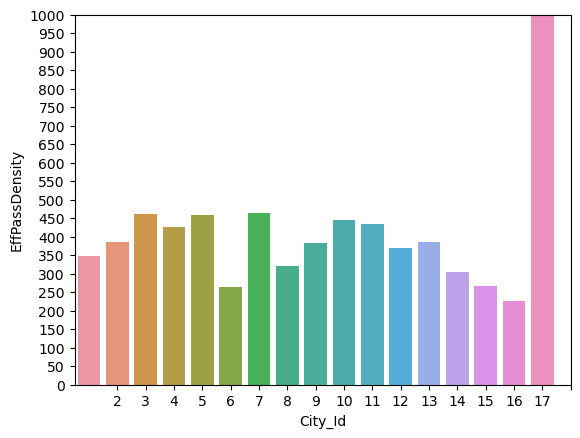

In [16]:
sns.barplot(x=X,y=Y,orient='v')
plt.xticks(X)
plt.ylim(0, 1000)  # Set the y-axis range from 0 to 100
plt.yticks(range(0, 1001, 50))
plt.show()

In [17]:
meanEPD=np.mean(D1['EffPassDensity'])
print('Mean of EffPassDensity:',meanEPD)

D1['EffPassDensity'].values

Mean of EffPassDensity: 698.7970588235295


array([ 347.504,  386.441,  461.725,  425.984,  459.36 ,  263.12 ,
        464.38 ,  321.984,  383.827,  446.31 ,  435.627,  370.37 ,
        386.984,  305.89 ,  265.506,  226.863, 5927.675])

In [18]:
std_by_city = D1['EffPassDensity'].std()
variance=std_by_city**2
print('variance:',variance)
print('Standard deviation:',std_by_city)

variance: 1821187.294858184
Standard deviation: 1349.51372533153


In [19]:
#calculate the (X-mean) for each city and it as a column
XdiffMean=D1['EffPassDensity'][:15].values-meanEPD


NewD1={
    'City Id':D1['City_Id'][:15].values,
    'Schedules':D1['EffPassDensity'][:15].values,
    'Mean Variations':XdiffMean
}
NewD1=pd.DataFrame(NewD1)
NewD1

,City Id,Schedules,Mean Variations
0,1,347.504,-351.293059
1,2,386.441,-312.356059
2,3,461.725,-237.072059
3,4,425.984,-272.813059
4,5,459.360,-239.437059
5,6,263.120,-435.677059
6,7,464.380,-234.417059
7,8,321.984,-376.813059
8,9,383.827,-314.970059
9,10,446.310,-252.487059


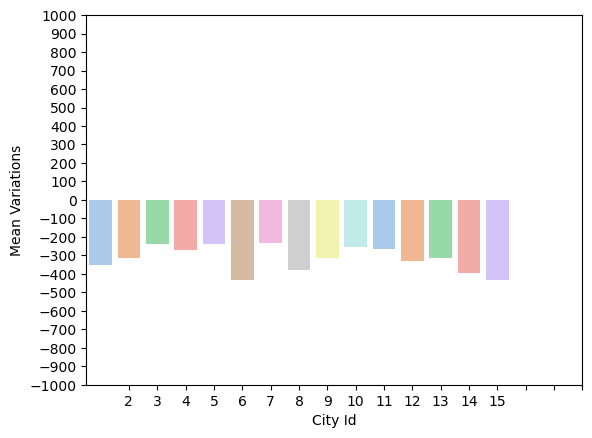

In [20]:
sns.barplot(x=NewD1['City Id'],y=NewD1['Mean Variations'],palette='pastel')
plt.xticks(X)
plt.ylim(0, 1000)  # Set the y-axis range from 0 to 100
plt.yticks(range(-1000, 1001, 100))
plt.show()

C:\Users\AISHWARYA\AppData\Local\Temp\ipykernel_11540\1783733234.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(pdf_values, shade = True)


<Axes: title={'center': 'Kernel Density Estimate Plot'}, ylabel='Density'>

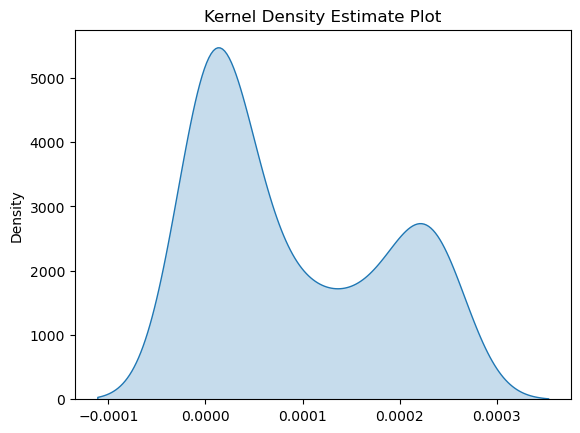

In [38]:
import statistics as stats
from scipy.stats import norm 
dfmean = np.mean(D1['Schedules'])
sd = np.std(D1['Schedules'])
sorted_data = D1['Schedules'].sort_values()
X=np.linspace(D1['Schedules'].min(),D1['Schedules'].max(),100)
plt.title('Kernel Density Estimate Plot')
pdf_values = norm.pdf(X, dfmean, sd)
sns.kdeplot(pdf_values, shade = True)

In [26]:
Stats = D1.describe(include='all')
cols = Stats.index.tolist()
Stats

Unnamed: 1,Schedules,Fleet Utilisation (%),% off road vehicles,Schedule kms (in lakh),Effective Kilometers (in lakh),City_Id,EffPassDensity
count,17.000000,17.000000,17,17,17,17.000000,17.000000
unique,NaN,NaN,16,17,17,NaN,NaN
top,NaN,NaN,4.6,55.55,58.91,NaN,NaN
freq,NaN,NaN,2,1,1,NaN,NaN
mean,879.411765,80.035294,NaN,NaN,NaN,9.000000,698.797059
std,1702.345920,7.252322,NaN,NaN,NaN,5.049752,1349.513725
min,277.000000,58.700000,NaN,NaN,NaN,1.000000,226.863000
25%,416.000000,77.400000,NaN,NaN,NaN,5.000000,321.984000
50%,488.000000,81.700000,NaN,NaN,NaN,9.000000,386.441000
75%,528.000000,83.200000,NaN,NaN,NaN,13.000000,446.310000


In [27]:
for col in D1.columns:
    D1[col] = pd.to_numeric(D1[col], errors='coerce')


In [28]:
for j in cols:
    for i in Stats.columns:
        if j == 'mean' and pd.isna(Stats.loc[j, i]):
            Stats.loc[j, i] = D1[i].mean()
        elif j == 'std' and pd.isna(Stats.loc[j, i]):
            Stats.loc[j, i] = D1[i].std()
        elif j == 'min' and pd.isna(Stats.loc[j, i]):
            Stats.loc[j, i] = D1[i].min()
        elif j == 'max' and pd.isna(Stats.loc[j, i]):
            Stats.loc[j, i] = D1[i].max()
        elif j == '25%' and pd.isna(Stats.loc[j, i]):
            Stats.loc[j, i] = D1[i].quantile(q=0.25)
        elif j == '50%' and pd.isna(Stats.loc[j, i]):
            Stats.loc[j, i] = D1[i].quantile(q=0.50)
        elif j == '75%' and pd.isna(Stats.loc[j, i]):
            Stats.loc[j, i] = D1[i].quantile(q=0.75)

# Display the updated Stats DataFrame
print(Stats)


Unnamed: 1    Schedules  Fleet Utilisation (%) % off road  vehicles  \
count         17.000000              17.000000                   17   
unique              NaN                    NaN                   16   
top                 NaN                    NaN                  4.6   
freq                NaN                    NaN                    2   
mean         879.411765              80.035294             5.041176   
std         1702.345920               7.252322             1.377071   
min          277.000000              58.700000                  3.3   
25%          416.000000              77.400000                  3.9   
50%          488.000000              81.700000                  4.7   
75%          528.000000              83.200000                  5.9   
max         7475.000000              90.500000                  7.5   

Unnamed: 1 Schedule kms (in lakh) Effective Kilometers (in lakh)    City_Id  \
count                          17                             17  17

<class 'numpy.int64'>


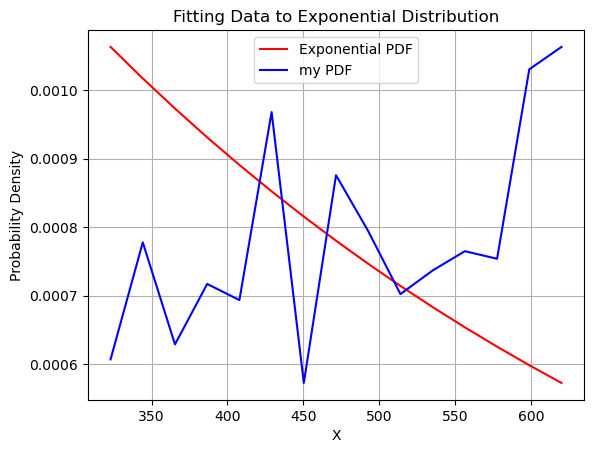

[0.00106305 0.00101708 0.00097309 0.00093101 0.00089075 0.00085223
 0.00081537 0.00078011 0.00074638 0.0007141  0.00068322 0.00065367
 0.0006254  0.00059836 0.00057248] [0.00060688 0.00077768 0.00062876 0.00071697 0.00069346 0.00096789
 0.00057248 0.00087576 0.00079405 0.00070219 0.00073666 0.00076482
 0.00075374 0.00103034 0.00106305]


In [29]:
from scipy.stats import expon

# Given data
data = D1['Schedules'][0:15].to_numpy()
# Calculate lambda for the exponential distribution
lambda_param = 1 / data.mean()
print(type(data[0]))
myData=data.astype('float64')


# Generate x values for the plot
x_range = np.linspace(min(data), max(data), 15)
Data=-lambda_param*x_range
myData=-lambda_param*myData
# Calculate the exponential PDF values
pdf_values = np.exp(Data)
myPdf=np.exp(myData)

pdf_values=lambda_param*pdf_values
myPdf=lambda_param*myPdf

# Plot the exponential PDF curve
plt.plot(x_range, pdf_values, color='red', label='Exponential PDF')
plt.plot(x_range, myPdf, color='blue', label='my PDF')
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.title('Fitting Data to Exponential Distribution')
plt.legend()
plt.grid(True)
plt.show()

print(pdf_values,myPdf)

In [30]:
#Left with:
'''
Correlation Analysis
Scatter Plot
Scatter heat map'''


'\nCorrelation Analysis\nScatter Plot\nScatter heat map'

In [31]:
D1.columns

Index(['Schedules', 'Fleet Utilisation (%)', '% off road  vehicles',
       'Schedule kms (in lakh)', 'Effective Kilometers (in lakh)', 'City_Id',
       'EffPassDensity'],
      dtype='object', name='Unnamed: 1')

In [34]:
D1['EffPassDensity'].values

array([ 347.504,  386.441,  461.725,  425.984,  459.36 ,  263.12 ,
        464.38 ,  321.984,  383.827,  446.31 ,  435.627,  370.37 ,
        386.984,  305.89 ,  265.506,  226.863, 5927.675])

In [35]:
Xfactor=D1['EffPassDensity'][:15].values
Yfactor=D1['Effective Kilometers (in lakh)'][:15].values
print(Xfactor.size,Yfactor.size)
R=scipy.stats.pearsonr(Xfactor,Yfactor)
print("Coefficient of correlation between EffPassDensity & Effective Kilometers (in lakh):",R[0])

15 15
Coefficient of correlation between EffPassDensity & Effective Kilometers (in lakh): 0.7848453406312368


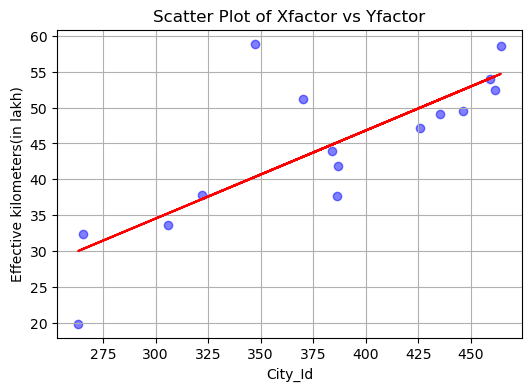

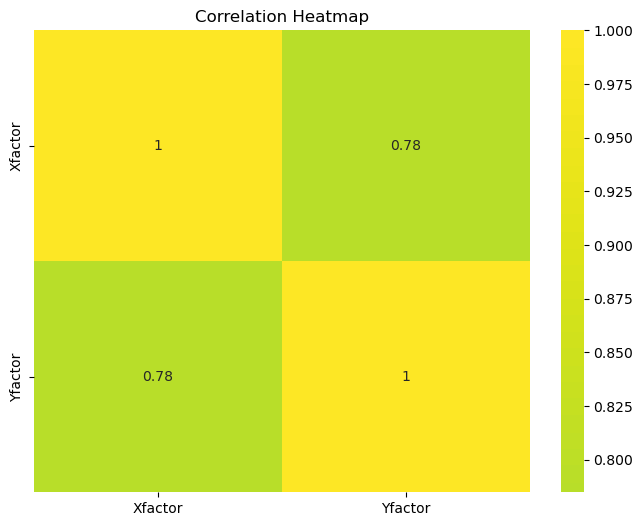

In [36]:
data = {
    'Xfactor': D1['EffPassDensity'][:15].values,
    'Yfactor': D1['Effective Kilometers (in lakh)'][:15].values
}
Df=pd.DataFrame(data)
corrMatrix=Df.corr()
corrMatrix
Df['Xfactor'] = pd.to_numeric(Df['Xfactor'])
Df['Yfactor'] = pd.to_numeric(Df['Yfactor'])

subset_df=Df[:15]
slope, intercept = np.polyfit(subset_df['Xfactor'], subset_df['Yfactor'], 1)
regression_line = slope * subset_df['Xfactor'] + intercept

plt.figure(figsize=(6, 4))
plt.scatter(Df['Xfactor'][:15], Df['Yfactor'][:15], color='blue', alpha=0.5)
plt.plot(subset_df['Xfactor'], regression_line, color='red', label='Regression Line')
plt.xlabel('City_Id')
plt.ylabel('Effective kilometers(in lakh)')
plt.title('Scatter Plot of Xfactor vs Yfactor')
plt.grid(True)

plt.show()


plt.figure(figsize=(8, 6))
sns.heatmap(corrMatrix, annot=True, cmap='viridis', center=0,linecolor='blue')
plt.title('Correlation Heatmap')
plt.show()


